# Churn
(supervised training)

## Content

1. [Introduction](#intro)
2. [General information](#general)
3. [Preparing data](#prepare)
4. [Examine](#examine)
5. [Disbalance](#disbalance)
6. [ROC_Curve](#roc_curvey)
7. [Testing](#test)
8. [Conclusion](#conclusion)

## Introduction <a href = 'intro'></a>

Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

*Features*
- RowNumber — data string index
- CustomerId — unique customer identifier
- Surname — surname
- CreditScore — credit score
- Geography — country of residence
- Gender — gender
- Age — age
- Tenure — number of property that client has
- Balance — account balance
- NumOfProducts — number of banking products used by the customer
- HasCrCard — customer has a credit card
- IsActiveMember — customer’s activeness
- EstimatedSalary — estimated salary

Target
- Exited — сustomer has left

*Libraries*

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings
warnings.filterwarnings('ignore')

## General information <a href = 'general'></a>

First we need to know what data we have.

In [2]:
try:
    churn_dataset = pd.read_csv('Churn.csv')
except:
    churn_dataset = pd.read_csv('/datasets/Churn.csv')

In [3]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_dataset.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7067,7068,15761854,Burn,746,France,Female,24,4.0,0.00,1,0,1,94105.00,0
1379,1380,15571752,Romani,668,Germany,Female,32,NaN,92041.87,1,1,1,43595.90,0
8683,8684,15599329,Christopher,697,France,Female,49,7.0,195238.29,4,0,1,131083.56,1
4153,4154,15664001,Riddle,695,Germany,Female,53,NaN,95231.91,1,0,0,70140.80,1
5400,5401,15644788,Fyodorov,731,France,Female,30,5.0,0.00,2,1,0,189528.72,0
9256,9257,15758451,Azuka,765,Germany,Male,37,7.0,102708.77,1,1,0,9087.81,0
7065,7066,15568162,Sung,527,Spain,Male,53,8.0,0.00,1,1,1,51711.57,0
3884,3885,15735788,Chiagoziem,709,France,Male,31,6.0,0.00,2,1,1,71009.84,0
1574,1575,15693018,Ermakova,678,Germany,Male,23,10.0,115563.71,1,1,1,91633.53,0
6701,6702,15629390,Liao,653,France,Male,37,7.0,135847.47,1,1,0,144880.81,0


In [5]:
churn_dataset.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
churn_dataset.duplicated().sum()


0

Text(0.5, 0.98, 'Leave or not')

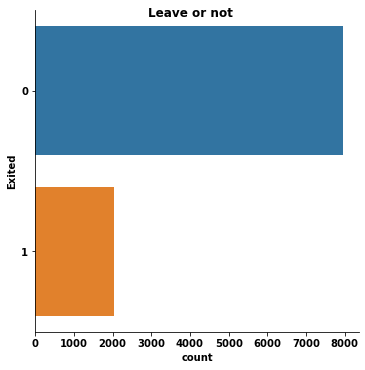

In [7]:
exited = sns.catplot(y='Exited', data=churn_dataset, kind='count', order=churn_dataset.Exited.value_counts().index)
exited.fig.suptitle('Leave or not')

Text(0.5, 0.98, 'Geography')

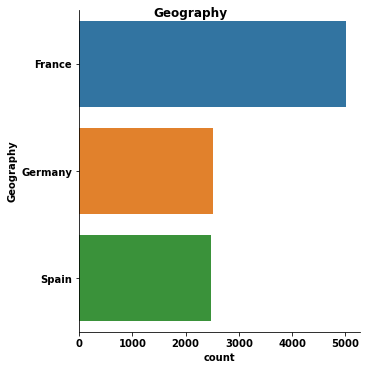

In [8]:
geog=sns.catplot(y='Geography', data=churn_dataset, kind='count', order=churn_dataset.Geography.value_counts().index)
geog.fig.suptitle('Geography')

Text(0.5, 1.0, 'EstimatedSalary')

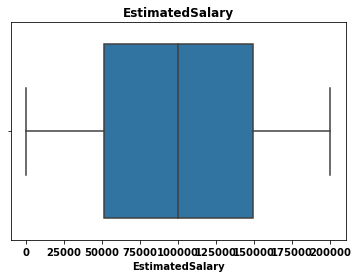

In [9]:
est_salary = sns.boxplot(churn_dataset['EstimatedSalary'])
est_salary.set_title('EstimatedSalary')

Text(0.5, 1.0, 'Balance')

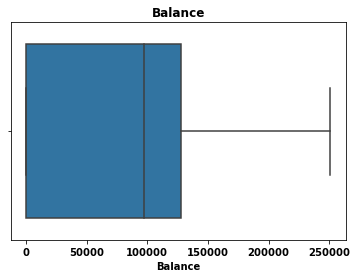

In [10]:
balance = sns.boxplot(churn_dataset['Balance'])
balance.set_title('Balance')

Text(0.5, 0.98, 'Credit Card')

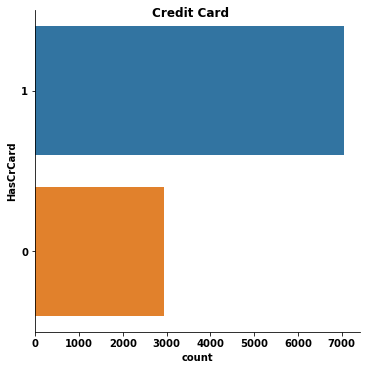

In [11]:
has_card = sns.catplot(y='HasCrCard', data=churn_dataset, kind='count', order=churn_dataset.HasCrCard.value_counts().index)
has_card.fig.suptitle('Credit Card')

Text(0.5, 0.98, 'Is Active Member')

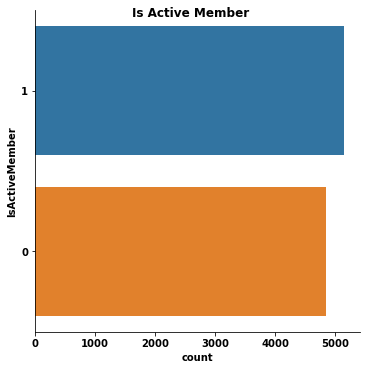

In [12]:
activ_member = sns.catplot(y='IsActiveMember', data=churn_dataset, kind='count', order=churn_dataset.IsActiveMember.value_counts().index)
activ_member.fig.suptitle('Is Active Member')

Text(0.5, 0.98, 'Number of Products')

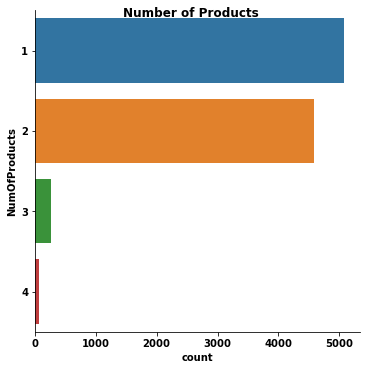

In [13]:
products = sns.catplot(y='NumOfProducts', data=churn_dataset, kind='count', order=churn_dataset.NumOfProducts    .value_counts().index)
products.fig.suptitle('Number of Products')

### Conclusion

We have dataset with 14 columns and 10000 entries.
Missing data in a column "Tenure". This column gives us information about if client has property or not. It is possible that client doesn't have any property. We can fill it with 0 or delete this 9% of data. Better to delete because amount of missing data is not very big, but we don't know for sure what can be property in these countries.<br>
Also in this column we need to change datatype (float -> int)<br>
No duplicates

We got that only 2000 clients from 10000 are living (20%). It is pretty much big present.

Most of the clients are living in France about 5000. About 2500 clients are living in Germany and Spain. An international bank and just 10000 clients?

Some data like in columns "Balance" and "EstimatedSalary" seems weired. Why we have data in these columns equals to 0? Negative balance on a bank account it is not at rare situation. It is seems that this data can have a correlation.

Most of the clients has credit card.

Most of the clients use one-two product/service.

No big difference between an amount of clients who was defined as active and not active.


## Preparing data <a href = 'prepare'></a>

Before training a model we need to prepare data.

Column "Tenure": delete missing data, change datatype;
Columns "RowNumber", "CustomerId", "Surname": drop (we don't need it for training)
Columns "Geography", "Gender": convert to numeric.

In [14]:
#defined random_state
rst = 123456

In [15]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(churn_dataset[numeric])
churn_dataset[numeric] = scaler.transform(churn_dataset[numeric])


In [16]:
churn_dataset.dropna(subset=['Tenure'], inplace=True)
churn_dataset['Tenure'] = churn_dataset['Tenure'].astype('int64')
# churn_dataset.info()
# churn_dataset.isna().sum()

In [17]:
churn_dataset_drop = churn_dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
# churn_dataset_drop.sample(5)

In [18]:
churn_dataset_ohe = pd.get_dummies(churn_dataset_drop, columns=['Geography', 'Gender'])
churn_dataset_ohe.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8341,-1.391939,-0.755372,0,-1.225848,0.807737,1,0,0.419284,0,0,0,1,1,0
5715,1.608626,-0.755372,1,-1.225848,0.807737,0,1,0.696918,0,1,0,0,0,1
8352,-0.657318,0.960993,0,1.264669,0.807737,1,0,-1.509053,1,0,1,0,1,0
6994,-0.967722,-1.422847,0,-1.225848,-0.911583,0,0,-1.383721,0,1,0,0,1,0
4881,-0.740092,-0.755372,0,-1.225848,0.807737,1,0,-1.285760,0,1,0,0,0,1


In [19]:
churn_dataset_ohe.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
CreditScore,1.000000,-0.004504,0.000114,0.002804,0.011090,-0.003937,0.030947,0.005182,-0.023950,-0.001861,0.000428,0.001725,0.008547,-0.008547
Age,-0.004504,1.000000,-0.013312,0.031481,-0.031877,-0.014129,0.082269,-0.007037,0.283017,-0.037742,0.049038,-0.005622,0.025631,-0.025631
Tenure,0.000114,-0.013312,1.000000,-0.003479,0.007014,0.028728,-0.034598,0.005073,-0.009000,-0.007619,0.002078,0.006739,-0.016122,0.016122
Balance,0.002804,0.031481,-0.003479,1.000000,-0.301858,-0.019055,-0.003285,0.014351,0.117218,-0.230710,0.401701,-0.136986,-0.018030,0.018030
NumOfProducts,0.011090,-0.031877,0.007014,-0.301858,1.000000,0.005805,0.009084,0.013990,-0.050271,-0.002039,-0.009476,0.011903,0.025176,-0.025176
HasCrCard,-0.003937,-0.014129,0.028728,-0.019055,0.005805,1.000000,-0.008810,-0.006136,-0.005411,0.007394,0.009149,-0.017779,-0.006016,0.006016
IsActiveMember,0.030947,0.082269,-0.034598,-0.003285,0.009084,-0.008810,1.000000,-0.020049,-0.155062,0.001840,-0.016821,0.014800,-0.025019,0.025019
EstimatedSalary,0.005182,-0.007037,0.005073,0.014351,0.013990,-0.006136,-0.020049,1.000000,0.016029,-0.000543,0.011551,-0.010998,0.002658,-0.002658
Exited,-0.023950,0.283017,-0.009000,0.117218,-0.050271,-0.005411,-0.155062,0.016029,1.000000,-0.106426,0.178131,-0.055971,0.110450,-0.110450
Geography_France,-0.001861,-0.037742,-0.007619,-0.230710,-0.002039,0.007394,0.001840,-0.000543,-0.106426,1.000000,-0.581355,-0.573726,-0.007309,0.007309


In [20]:
target = churn_dataset_ohe['Exited']
features = churn_dataset_ohe.drop('Exited', axis=1)

In [21]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.20, random_state=rst)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, test_size=0.5, random_state=rst)

print(features_test.shape, target_test.shape)
print(features_train.shape, target_train.shape)
print(features_valid.shape, target_valid.shape)

(910, 13) (910,)
(7272, 13) (7272,)
(909, 13) (909,)


### Conclusion
1. Scaled quantitative character
2. In a column "Tenure" we deleted missing data and change datatype into integer
3. 'Drop' columns that are not 'taking part' in training.
4. Convert data in columns "Geography" and "Gender" into 0 and 1.
5. Defined 'target' and 'features' variables.
6. Divide dataset into test, train and valid sets.

## Examine  <a href = "examine"></a>


We will work with:
- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression
(With imbalance in a target)

In [22]:
#DecisionTreeClassifier
for depth in range(1, 21):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=rst)
    model_dtc.fit(features_train, target_train)
    predicted_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_dtc)

    print('max_depth =', depth, ':', f1_dtc)

max_depth = 1 : 0.0
max_depth = 2 : 0.482084690553746
max_depth = 3 : 0.39834024896265563
max_depth = 4 : 0.4981949458483754
max_depth = 5 : 0.5285714285714286
max_depth = 6 : 0.5597269624573379
max_depth = 7 : 0.559748427672956
max_depth = 8 : 0.5602605863192182
max_depth = 9 : 0.5769230769230769
max_depth = 10 : 0.5686900958466453
max_depth = 11 : 0.5345911949685535
max_depth = 12 : 0.5421686746987951
max_depth = 13 : 0.5352941176470588
max_depth = 14 : 0.49851632047477734
max_depth = 15 : 0.5284090909090909
max_depth = 16 : 0.5170454545454545
max_depth = 17 : 0.5157593123209169
max_depth = 18 : 0.516304347826087
max_depth = 19 : 0.5041551246537396
max_depth = 20 : 0.5094850948509485


In [23]:
#RandomForestClassifier
for est in range(100, 121):
    model_rfc = RandomForestClassifier(random_state = rst, n_estimators = est)
    model_rfc.fit(features_train, target_train)
    predicted_rfc = model_rfc.predict(features_valid)
    f1_rfc = f1_score(target_valid, predicted_rfc)

    print('n_estimators =', est, ':', f1_rfc)

n_estimators = 100 : 0.532871972318339
n_estimators = 101 : 0.5379310344827586
n_estimators = 102 : 0.532871972318339
n_estimators = 103 : 0.529209621993127
n_estimators = 104 : 0.5310344827586208
n_estimators = 105 : 0.5324232081911263
n_estimators = 106 : 0.5379310344827586
n_estimators = 107 : 0.5360824742268041
n_estimators = 108 : 0.5310344827586208
n_estimators = 109 : 0.5342465753424658
n_estimators = 110 : 0.5310344827586208
n_estimators = 111 : 0.5360824742268041
n_estimators = 112 : 0.5208333333333334
n_estimators = 113 : 0.5241379310344827
n_estimators = 114 : 0.5156794425087107
n_estimators = 115 : 0.5223367697594502
n_estimators = 116 : 0.5241379310344827
n_estimators = 117 : 0.5205479452054795
n_estimators = 118 : 0.5223367697594502
n_estimators = 119 : 0.5273972602739726
n_estimators = 120 : 0.5241379310344827


In [24]:
#LogisticRegression
model_lr = LogisticRegression(random_state=rst)
model_lr.fit(features_train, target_train)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)

print(f1_lr)

0.2436974789915966


#### Conclusion
The worst f1 score we have on LogisticRegression model.
The best f1 score we have on DecisionTreeClassifier model with max_depth - 9 (f1 = 0.58) and RandomForestClassifier with n_estimators - 101 (f1 = 0.54)

## Disbalance <a href = "disbalance"></a>

*Class Weight*

In [25]:
#DecisionTreeClassifier
for depth in range(1, 21):
    model_dtc = DecisionTreeClassifier(max_depth=depth, random_state=rst, class_weight='balanced')
    model_dtc.fit(features_train, target_train)
    predicted_dtc = model_dtc.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_dtc)

    print('max_depth =', depth, ':', f1_dtc)


max_depth = 1 : 0.45777777777777773
max_depth = 2 : 0.4904051172707889
max_depth = 3 : 0.4904051172707889
max_depth = 4 : 0.5473684210526316
max_depth = 5 : 0.5579567779960707
max_depth = 6 : 0.5443298969072166
max_depth = 7 : 0.5647558386411891
max_depth = 8 : 0.5388127853881279
max_depth = 9 : 0.5789473684210525
max_depth = 10 : 0.5525114155251142
max_depth = 11 : 0.5433255269320842
max_depth = 12 : 0.5454545454545455
max_depth = 13 : 0.5317073170731708
max_depth = 14 : 0.5340050377833754
max_depth = 15 : 0.5141388174807199
max_depth = 16 : 0.5052631578947369
max_depth = 17 : 0.5130890052356022
max_depth = 18 : 0.5150684931506849
max_depth = 19 : 0.5217391304347826
max_depth = 20 : 0.5195530726256984


In [26]:
#RandomForestClassifier
for est in range(110, 131):
    model_rfc = RandomForestClassifier(random_state = rst, n_estimators = est, class_weight='balanced')
    model_rfc.fit(features_train, target_train)
    predicted_rfc = model_rfc.predict(features_valid)
    f1_rfc = f1_score(target_valid, predicted_rfc)

    print('n_estimators =', est, ':', f1_rfc)


n_estimators = 110 : 0.5087108013937282
n_estimators = 111 : 0.5051903114186851
n_estimators = 112 : 0.5069444444444444
n_estimators = 113 : 0.5051903114186851
n_estimators = 114 : 0.5017421602787456
n_estimators = 115 : 0.5051903114186851
n_estimators = 116 : 0.5069444444444444
n_estimators = 117 : 0.5103448275862069
n_estimators = 118 : 0.5087108013937282
n_estimators = 119 : 0.5103448275862069
n_estimators = 120 : 0.5087108013937282
n_estimators = 121 : 0.5051903114186851
n_estimators = 122 : 0.5087108013937282
n_estimators = 123 : 0.5069444444444444
n_estimators = 124 : 0.5087108013937282
n_estimators = 125 : 0.5087108013937282
n_estimators = 126 : 0.5087108013937282
n_estimators = 127 : 0.5085910652920963
n_estimators = 128 : 0.5069444444444444
n_estimators = 129 : 0.5121107266435986
n_estimators = 130 : 0.5138888888888888


In [27]:
#LogisticRegression
model_lr = LogisticRegression(random_state=rst, class_weight='balanced', solver='liblinear')
model_lr.fit(features_train, target_train)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)

print(f1_lr)

0.486815415821501


*Upsample*

In [28]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=rst)

    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 5)
print(target_train.value_counts())
target_upsampled.value_counts()

0    5795
1    1477
Name: Exited, dtype: int64


1    7385
0    5795
Name: Exited, dtype: int64

In [29]:
# DecisionTreeClassifier
for depth in range(1, 11):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=rst)
    model.fit(features_upsampled, target_upsampled)
    predicted_dtc = model.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_dtc)
    print('max_depth =', depth, ':', f1_dtc)

max_depth = 1 : 0.45777777777777773
max_depth = 2 : 0.4904051172707889
max_depth = 3 : 0.4904051172707889
max_depth = 4 : 0.5473684210526316
max_depth = 5 : 0.5579567779960707
max_depth = 6 : 0.5443298969072166
max_depth = 7 : 0.5623678646934461
max_depth = 8 : 0.5409090909090909
max_depth = 9 : 0.5727923627684964
max_depth = 10 : 0.5365853658536585


In [30]:
#RandomForestClassifier
for est in range(100, 121):
    model_rfc = RandomForestClassifier(random_state = rst, n_estimators = est, class_weight='balanced')
    model_rfc.fit(features_upsampled, target_upsampled)
    predicted_rfc = model_rfc.predict(features_valid)
    f1_rfc = f1_score(target_valid, predicted_rfc)

    print('n_estimators =', est, ':', f1_rfc)

n_estimators = 100 : 0.5663716814159292
n_estimators = 101 : 0.5663716814159292
n_estimators = 102 : 0.5637982195845698
n_estimators = 103 : 0.5730994152046783
n_estimators = 104 : 0.5647058823529412
n_estimators = 105 : 0.5689149560117303
n_estimators = 106 : 0.5604719764011798
n_estimators = 107 : 0.5588235294117647
n_estimators = 108 : 0.5604719764011798
n_estimators = 109 : 0.5571847507331378
n_estimators = 110 : 0.5595238095238094
n_estimators = 111 : 0.5663716814159292
n_estimators = 112 : 0.5663716814159292
n_estimators = 113 : 0.565597667638484
n_estimators = 114 : 0.5595238095238094
n_estimators = 115 : 0.5689149560117303
n_estimators = 116 : 0.5663716814159292
n_estimators = 117 : 0.5689149560117303
n_estimators = 118 : 0.5621301775147929
n_estimators = 119 : 0.5663716814159292
n_estimators = 120 : 0.5621301775147929


In [31]:
#LogisticRegression
model_lr = LogisticRegression(random_state=rst, class_weight='balanced', solver='liblinear')
model_lr.fit(features_upsampled, target_upsampled)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)

print(f1_lr)

0.486815415821501


*Downsample*

In [32]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=rst)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=rst)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=rst)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.8)

In [33]:
# DecisionTreeClassifier
for depth in range(1, 21):
    model = DecisionTreeClassifier(max_depth=depth, class_weight='balanced', random_state=rst)
    model.fit(features_downsampled, target_downsampled)
    predicted_dtc = model.predict(features_valid)
    f1_dtc = f1_score(target_valid, predicted_dtc)
    print('max_depth =', depth, ':', f1_dtc)

max_depth = 1 : 0.45777777777777773
max_depth = 2 : 0.4904051172707889
max_depth = 3 : 0.5373961218836565
max_depth = 4 : 0.5427350427350428
max_depth = 5 : 0.564
max_depth = 6 : 0.5610278372591007
max_depth = 7 : 0.5499999999999999
max_depth = 8 : 0.5405405405405406
max_depth = 9 : 0.5154185022026432
max_depth = 10 : 0.5327313769751694
max_depth = 11 : 0.519721577726218
max_depth = 12 : 0.5245098039215687
max_depth = 13 : 0.5037406483790524
max_depth = 14 : 0.4924623115577889
max_depth = 15 : 0.46113989637305697
max_depth = 16 : 0.4776902887139107
max_depth = 17 : 0.4789473684210526
max_depth = 18 : 0.4814814814814815
max_depth = 19 : 0.4680851063829788
max_depth = 20 : 0.4823848238482385


In [34]:
#RandomForestClassifier
for est in range(21, 50):
    model_rfc = RandomForestClassifier(random_state = rst, n_estimators = est, class_weight='balanced')
    model_rfc.fit(features_downsampled, target_downsampled)
    predicted_rfc = model_rfc.predict(features_valid)
    f1_rfc = f1_score(target_valid, predicted_rfc)

    print('n_estimators =', est, ':', f1_rfc)

n_estimators = 21 : 0.5454545454545455
n_estimators = 22 : 0.5354838709677419
n_estimators = 23 : 0.5420560747663552
n_estimators = 24 : 0.5294117647058824
n_estimators = 25 : 0.5384615384615384
n_estimators = 26 : 0.5311475409836065
n_estimators = 27 : 0.5337620578778135
n_estimators = 28 : 0.5377049180327869
n_estimators = 29 : 0.5414012738853504
n_estimators = 30 : 0.5442622950819672
n_estimators = 31 : 0.5477707006369427
n_estimators = 32 : 0.5490196078431373
n_estimators = 33 : 0.5477707006369427
n_estimators = 34 : 0.5424836601307189
n_estimators = 35 : 0.5477707006369427
n_estimators = 36 : 0.5490196078431373
n_estimators = 37 : 0.5559105431309904
n_estimators = 38 : 0.5472312703583062
n_estimators = 39 : 0.5483870967741936
n_estimators = 40 : 0.5508196721311476
n_estimators = 41 : 0.5576923076923077
n_estimators = 42 : 0.5566343042071198
n_estimators = 43 : 0.555205047318612
n_estimators = 44 : 0.549520766773163
n_estimators = 45 : 0.5488958990536278
n_estimators = 46 : 0.54313

In [35]:
#LogisticRegression
model_lr = LogisticRegression(random_state=rst, class_weight='balanced', solver='liblinear')
model_lr.fit(features_downsampled, target_downsampled)
predicted_lr = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predicted_lr)

print(f1_lr)

0.4869215291750503


### Conclusion

1. After we defined class_weight as balanced LogisticRegression model has better result but RandomForestClassifier and DecisionTreeClassifier have worthier results

## ROC_Curve <a href = "roc_curve"></a>

In [36]:

#RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = rst, n_estimators = 103, class_weight='balanced')
model_rfc.fit(features_upsampled, target_upsampled)
predicted_rfc = model_rfc.predict(features_valid)
f1_rfc = f1_score(target_valid, predicted_rfc)

probabilities_rfc = model_rfc.predict_proba(features_valid)
probabilities_valid_rfc = probabilities_rfc[:, 1]
auc_rfc = roc_auc_score(target_valid, probabilities_valid_rfc)
print('AUC RFC=', auc_rfc)
print('F1 RFC=', f1_rfc)

#DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=9, class_weight='balanced', random_state=rst)
model.fit(features_upsampled, target_upsampled)
predicted_dtc = model.predict(features_valid)
f1_dtc = f1_score(target_valid, predicted_dtc)

probabilities_dtc = model_dtc.predict_proba(features_valid)
probabilities_valid_dtc = probabilities_dtc[:, 1]
auc_dtc = roc_auc_score(target_valid, probabilities_valid_dtc)
print('---------')
print('AUC DTC=', auc_dtc)
print('F1 DTC=', f1_dtc)

# LogisticRegression
probabilities_lr = model_lr.predict_proba(features_valid)
probabilities_valid_lr = probabilities_lr[:, 1]
auc_lr = roc_auc_score(target_valid, probabilities_valid_lr)
print('---------')
print('AUC LR=', auc_lr)
print('F1 LR=', f1_lr)

AUC RFC= 0.8303903415676889
F1 RFC= 0.5730994152046783
---------
AUC DTC= 0.6981250658597901
F1 DTC= 0.5727923627684964
---------
AUC LR= 0.7669993526923482
F1 LR= 0.4869215291750503


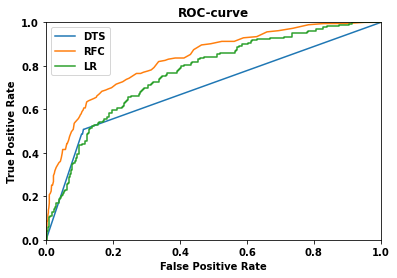

In [37]:
fpr_dtc, tpr_dtc, thresholds = roc_curve(target_valid, probabilities_valid_dtc)
fpr_rfc, tpr_rfc, thresholds = roc_curve(target_valid, probabilities_valid_rfc)
fpr_lr, tpr_lr, thresholds = roc_curve(target_valid, probabilities_valid_lr)


plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_lr, tpr_lr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(labels= ['DTS', 'RFC', 'LR'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-curve')
plt.show()


## Testing <a href = "test"></a>

In [38]:
# RandomForestClassifier
model_rfc = RandomForestClassifier(random_state = rst, n_estimators = 28, class_weight='balanced')
model_rfc.fit(features_upsampled, target_upsampled)
predicted_rfc = model_rfc.predict(features_test)
f1_trfc = f1_score(target_test, predicted_rfc)

probabilities_test_rfc = model_rfc.predict_proba(features_test)
probabilities_1test_rfc = probabilities_test_rfc[:, 1]
auc_trfc = roc_auc_score(target_test, probabilities_1test_rfc)
print('TAUC RTC=', auc_trfc)
print('TF1 RTC=', f1_trfc)

#DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=9, class_weight='balanced', random_state=rst)
model.fit(features_upsampled, target_upsampled)
predicted_dtc = model.predict(features_test)
f1_tdtc = f1_score(target_test, predicted_dtc)

probabilities_test_dtc = model_dtc.predict_proba(features_test)
probabilities_1test_dtc = probabilities_test_dtc[:, 1]
auc_tdtc = roc_auc_score(target_test, probabilities_1test_dtc)
print('---------')
print('TAUC DTC=', auc_tdtc)
print('TF1 DTC=', f1_tdtc)

# LogisticRegression
probabilities_test_lr = model_lr.predict_proba(features_test)
probabilities_1test_lr = probabilities_test_lr[:, 1]
auc_tlr = roc_auc_score(target_test, probabilities_1test_lr)
print('---------')
print('TAUC LR=', auc_lr)
print('TF1 LR=', f1_lr)

TAUC RTC= 0.8543238495651675
TF1 RTC= 0.6235955056179775
---------
TAUC DTC= 0.6861393480389333
TF1 DTC= 0.5764966740576497
---------
TAUC LR= 0.7669993526923482
TF1 LR= 0.4869215291750503


On a testing Set  AUC and F1 score is better with RandomForestClassifier.

## Conclusion <a href = "conclusion"></a>
1. We have dataset with 14 columns and 10000 entries.
2. We got that only 2000 clients from 10000 are living (20%). To understand it is normal or not we need to know churn rate. For each business it can be different.
3. Most of the clients are living in France about 5000. About 2500 clients are living in Germany and Spain.
4. Most of the clients has credit card.
5. Most of the clients use one-two product/service.
